<a href="https://colab.research.google.com/github/AndreyShor/TeamProject_Ai/blob/master/Linear_Regression%20Module_prediction_of_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

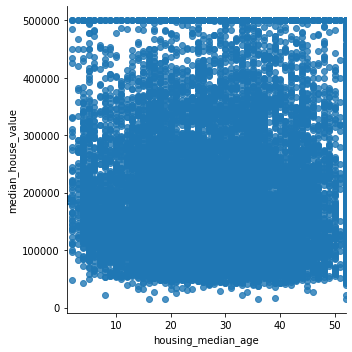

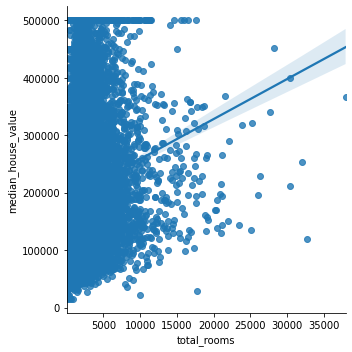

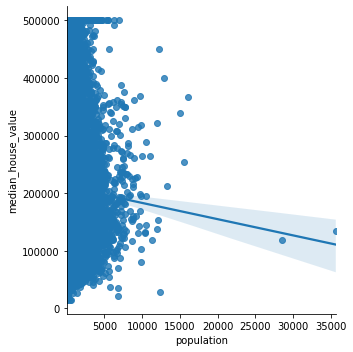

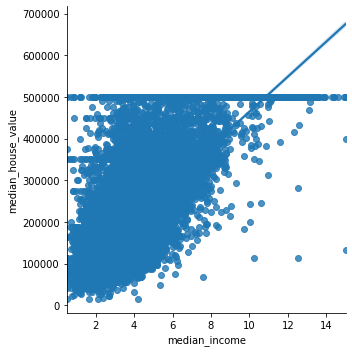

In [9]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("./sample_data/california_housing_train.csv")
df_learn = df[["housing_median_age", "total_rooms", "population", "median_income", "median_house_value"]]

df.head()

sns.lmplot(x="housing_median_age",y="median_house_value", data=df_learn)
sns.lmplot(x="total_rooms",y="median_house_value", data=df_learn)
sns.lmplot(x="population",y="median_house_value", data=df_learn)
sns.lmplot(x="median_income",y="median_house_value", data=df_learn)





# df.head()

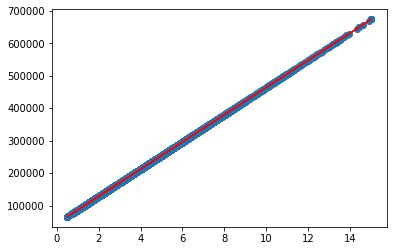

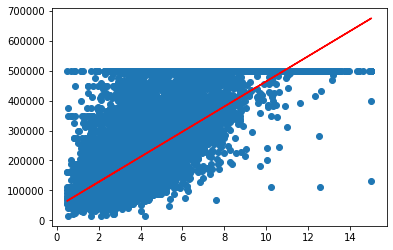

In [15]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("./sample_data/california_housing_train.csv")
df_test = pd.read_csv("./sample_data/california_housing_test.csv")


SalePrice = df[["median_house_value"]].values

YearBuilt = df[["median_income"]].values

YearBuilt_test = df[["median_income"]].values

# Convert from 2D array to 1D array ///////////////////////
y = []
x = []
test_x = []

for i in SalePrice:
  y.append(i[0])

for i in YearBuilt:
  x.append(i[0])

for i in YearBuilt_test:
  test_x.append(i[0])
# ///////////////////////////////////////////////////////////


# Find slope and intercept of training data 
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Prediction algorithm 
def predict(array, slope, intercept):
  result = []
  for x in array:
    y = slope * x + intercept
    result.append(y)
  return result

# Array of results
result_y_test = predict(test_x, slope, intercept)

result_y_test_df = {"SalePrice": result_y_test}

# Convert array into DataFrame
df_test_final = pd.DataFrame(result_y_test_df)

# Final DataFrame
df_test["median_house_value"] = df_test_final



# Show predicted graph result Test Data 
plt.scatter(test_x, result_y_test)
plt.plot(x, result_y_test, c="r")
plt.show()

# Show original graph of training data
plt.scatter(x, y)
plt.plot(x, result_y_test, c="r")
plt.show()

# # To download finall result of predicition 
# df_test_final.to_csv(r'./sample_data/test_final_result_price.csv')

